# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timedelta

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


676

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
city_weather_data = []
query_url = base_url + "appid=" + api_key + "&units=metric&q="

i=0

for item in cities:
    
    try:
       
        response = requests.get(query_url + item).json()
        city = response['name']
        cloudiness = response['clouds']['all']
        if cloudiness > 100:
            cloudiness = ""
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        if humidity > 100: 
            humidity = ""
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        
        print(f"Reading city number {i}: {item}")
            
        dict = {"City":city, "Cloudiness":cloudiness, "Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,
           "Max Temp":max_temp,"Wind Speed":wind_speed}

        city_weather_data.append(dict)
        
        i += 1
  
    except:
        
        print(f'error reading city: {item}')
     
    time.sleep(1)

Reading city number 0: vaini
Reading city number 1: punta arenas
Reading city number 2: kielce
Reading city number 3: jamestown
Reading city number 4: norman wells
Reading city number 5: kavieng
Reading city number 6: puerto ayora
Reading city number 7: bambous virieux
Reading city number 8: auki
Reading city number 9: anadyr
Reading city number 10: butaritari
Reading city number 11: glenwood springs
Reading city number 12: assens
Reading city number 13: east london
Reading city number 14: souillac
Reading city number 15: port alfred
Reading city number 16: kodiak
Reading city number 17: kapaa
Reading city number 18: kuala pilah
error reading city: taolanaro
error reading city: belushya guba
Reading city number 19: bira
Reading city number 20: rumoi
Reading city number 21: awbari
Reading city number 22: dymer
error reading city: bacuit
Reading city number 23: ndioum
Reading city number 24: jumla
Reading city number 25: gijon
Reading city number 26: busselton
Reading city number 27: faa

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df['Date'] = pd.to_datetime(city_weather_data_df['Date'],unit='s')
city_weather_data_df['Date'] = city_weather_data_df['Date'].dt.date
city_weather_data_df.to_csv(output_data_file)
city_weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,100,IN,2019-10-08,94,15.34,74.49,20.09,1.138
1,Punta Arenas,75,CL,2019-10-08,56,-53.16,-70.91,7.00,10.300
2,Kielce,100,PL,2019-10-08,1,50.87,20.63,8.89,5.155
3,Jamestown,38,AU,2019-10-08,40,-33.21,138.60,12.72,3.125
4,Norman Wells,40,CA,2019-10-08,51,65.28,-126.83,3.00,2.100
...,...,...,...,...,...,...,...,...,...
100,Cayenne,78,GF,2019-10-08,83,4.94,-52.33,27.00,2.600
101,Dunedin,100,NZ,2019-10-08,85,-45.87,170.50,12.22,3.130
102,Mocorito,3,MX,2019-10-08,56,25.48,-107.92,35.00,4.470
103,Hilo,1,US,2019-10-08,52,19.71,-155.08,31.00,3.600


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [14]:
date2 = datetime.fromtimestamp(date).strftime('%m/%d/%Y')


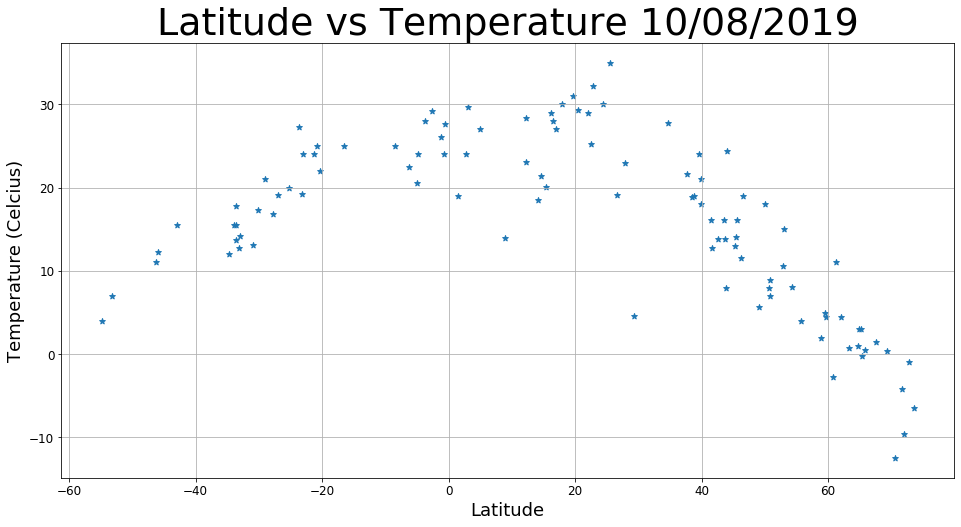

In [15]:

plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Max Temp'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Temperature", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Temperature (Celcius)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

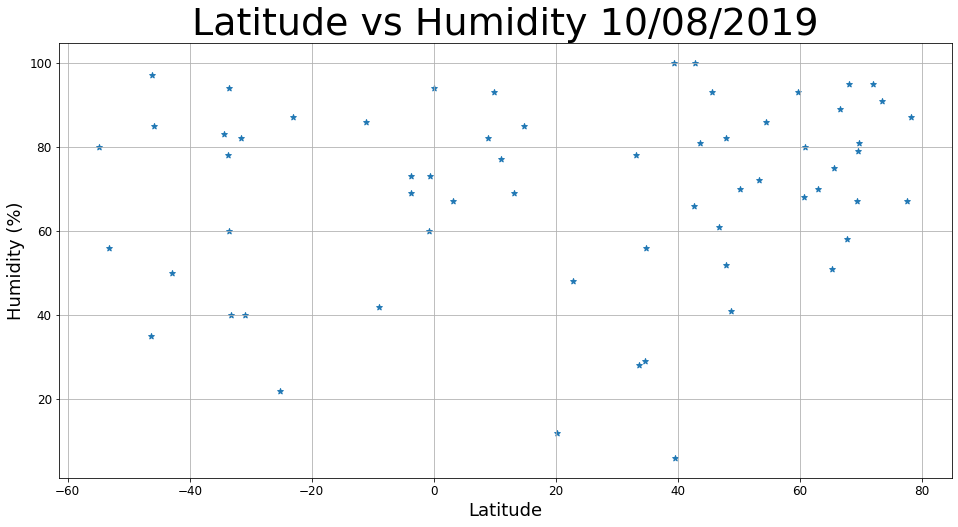

In [8]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Humidity'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Humidity", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Humidity (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

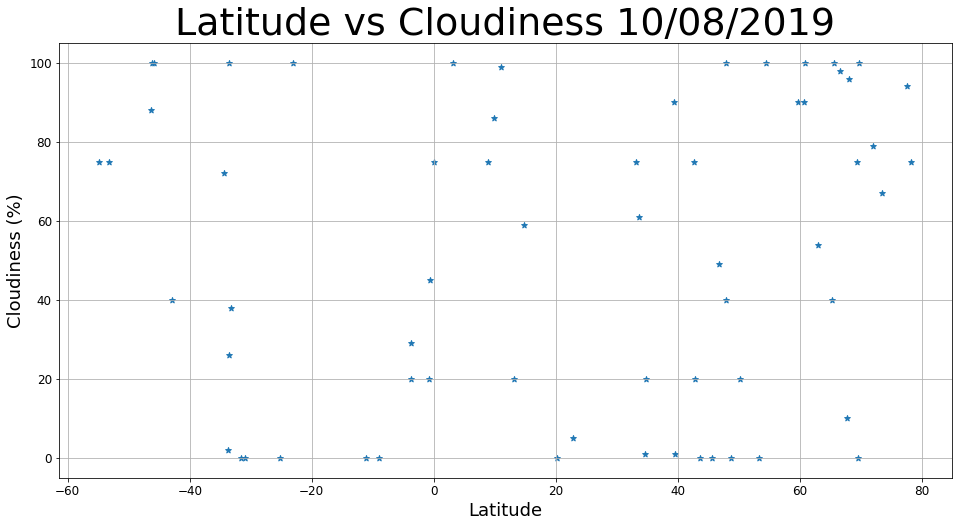

In [9]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Cloudiness'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Cloudiness", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Cloudiness (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

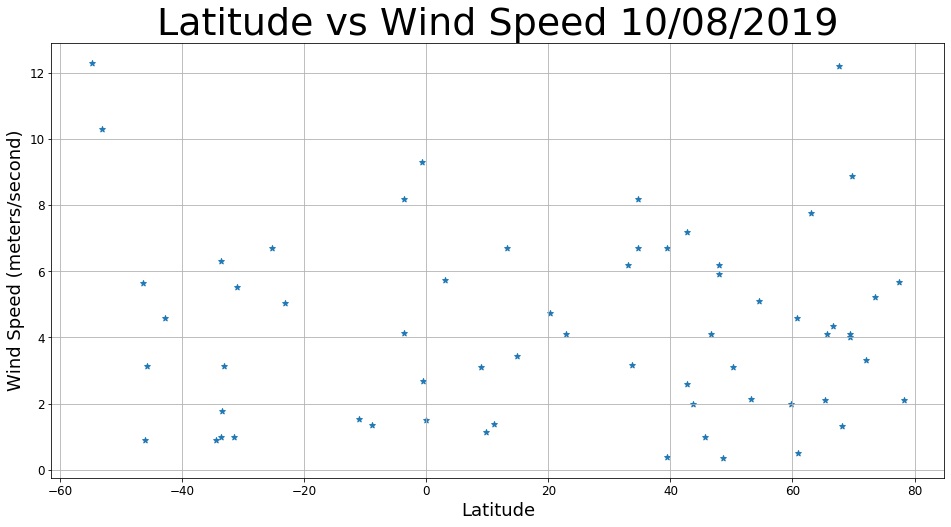

In [10]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Wind Speed'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Wind Speed", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Wind Speed (meters/second)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/WindSpeed.png")
plt.show()